In [275]:
import numpy as np
from scipy import integrate
import pandas as pd
from matplotlib import pyplot as plt
import glob

In [276]:
plt.style.use('science')


SMALL_SIZE = 9
MEDIUM_SIZE = 10
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=8)    # legend fontsize
# plt.rc('legend', titlesize=5)
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [280]:
coloursk = ['#003f5c','#bc5090' ,'#ffa600']
coloursa = ['#003f5c','#7a5195' ,'#ef5675', '#ffa600']
# colours = ['#ebe831','#ffae2f' ,'#ff725c']
leg_labelsk = ['$T_\\text{kin}^\infty$ = 100K', '$T_\\text{kin}^\infty$ = 1000K' , '$T_\\text{kin}^\infty$ = 1880K']
leg_labelsa = ['$T_\\text{kin}^\infty$ = 100K', '$T_\\text{kin}^\infty$ = 1000K' , '$T_\\text{kin}^\infty$ = 1880K', '$T_\\text{kin}^\infty$ = 2440K']
lss = [':','-', '--', '-.']

In [283]:
def tt_kh_plots():
    kheatfiles = glob.glob('*_kinheat_tt.dat')

    kheat_data = {}

    for file in kheatfiles:
        kheat_data[file.replace('_kinheat_tt.dat', '')] = pd.read_csv(file, sep="\t", header = None)
        
    fig, ax = plt.subplots(figsize = (6, 9), ncols=2, nrows =5, sharey = True, sharex = True, dpi = 300)
    fig.subplots_adjust(hspace=0, wspace=0)
    # fig.text(0.5, 0.09, '$m_\chi$ [GeV]', ha='center', va = 'center')
    # fig.text(0.04, 0.5, '$G^2$ [GeV$^{-4}$]', va='center', rotation='vertical')
    i=1
    for m, row in enumerate(ax):
        for n, col in enumerate(row):
            for j in range(len(kheat_data['d'+str(i)].columns))[2:]:
                col.loglog(kheat_data['d'+str(i)][0], kheat_data['d'+str(i)][j], coloursk[j-1], label = leg_labelsk[j-1], linestyle = lss[j-1])
                
#                 col.fill_between(kheat_data['d'+str(i)][0], kheat_data['d'+str(i)][j], color = coloursk[j-1], alpha = 0.08)
            col.axhline(10**10, 10**-4.8, 10**5, color = 'black', alpha = 0.3, linestyle = '--', label = '$\\tau_{th}$ = $10^{10}$ yrs')
            col.text(0.08, 0.9, 'D'+str(i), ha='center', va='center', transform=col.transAxes)
            col.fill_between(kheat_data['d1'][0], 10**10, np.inf, color = 'black', alpha = 0.2)
            col.set_xlabel('$m_\chi$ [GeV]')
            col.set_xlim(10**(-4.8), 1e5)
#             col.set_ylim(10**-3.5, 10**19)
#             col.fill_between(kheat_data['d1'][0], 10**10, 10**22, color = 'black', alpha = 0.2)
        
            col.grid(b=True, which='major',  linestyle='--', alpha=0.2)
            if n ==0:
                col.set_ylabel('$\\tau_\\text{th}$ [yrs]')
            if n == 1:
                col.legend(loc = (1, 0.5), shadow = False)#.set_title(title = '$T^\infty$ [K]', prop={"size": 5})
            i+=1
    plt.savefig('ttkh_plots.pdf')
    plt.show()

/home/student.unimelb.edu.au/mvirgato/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:6652: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


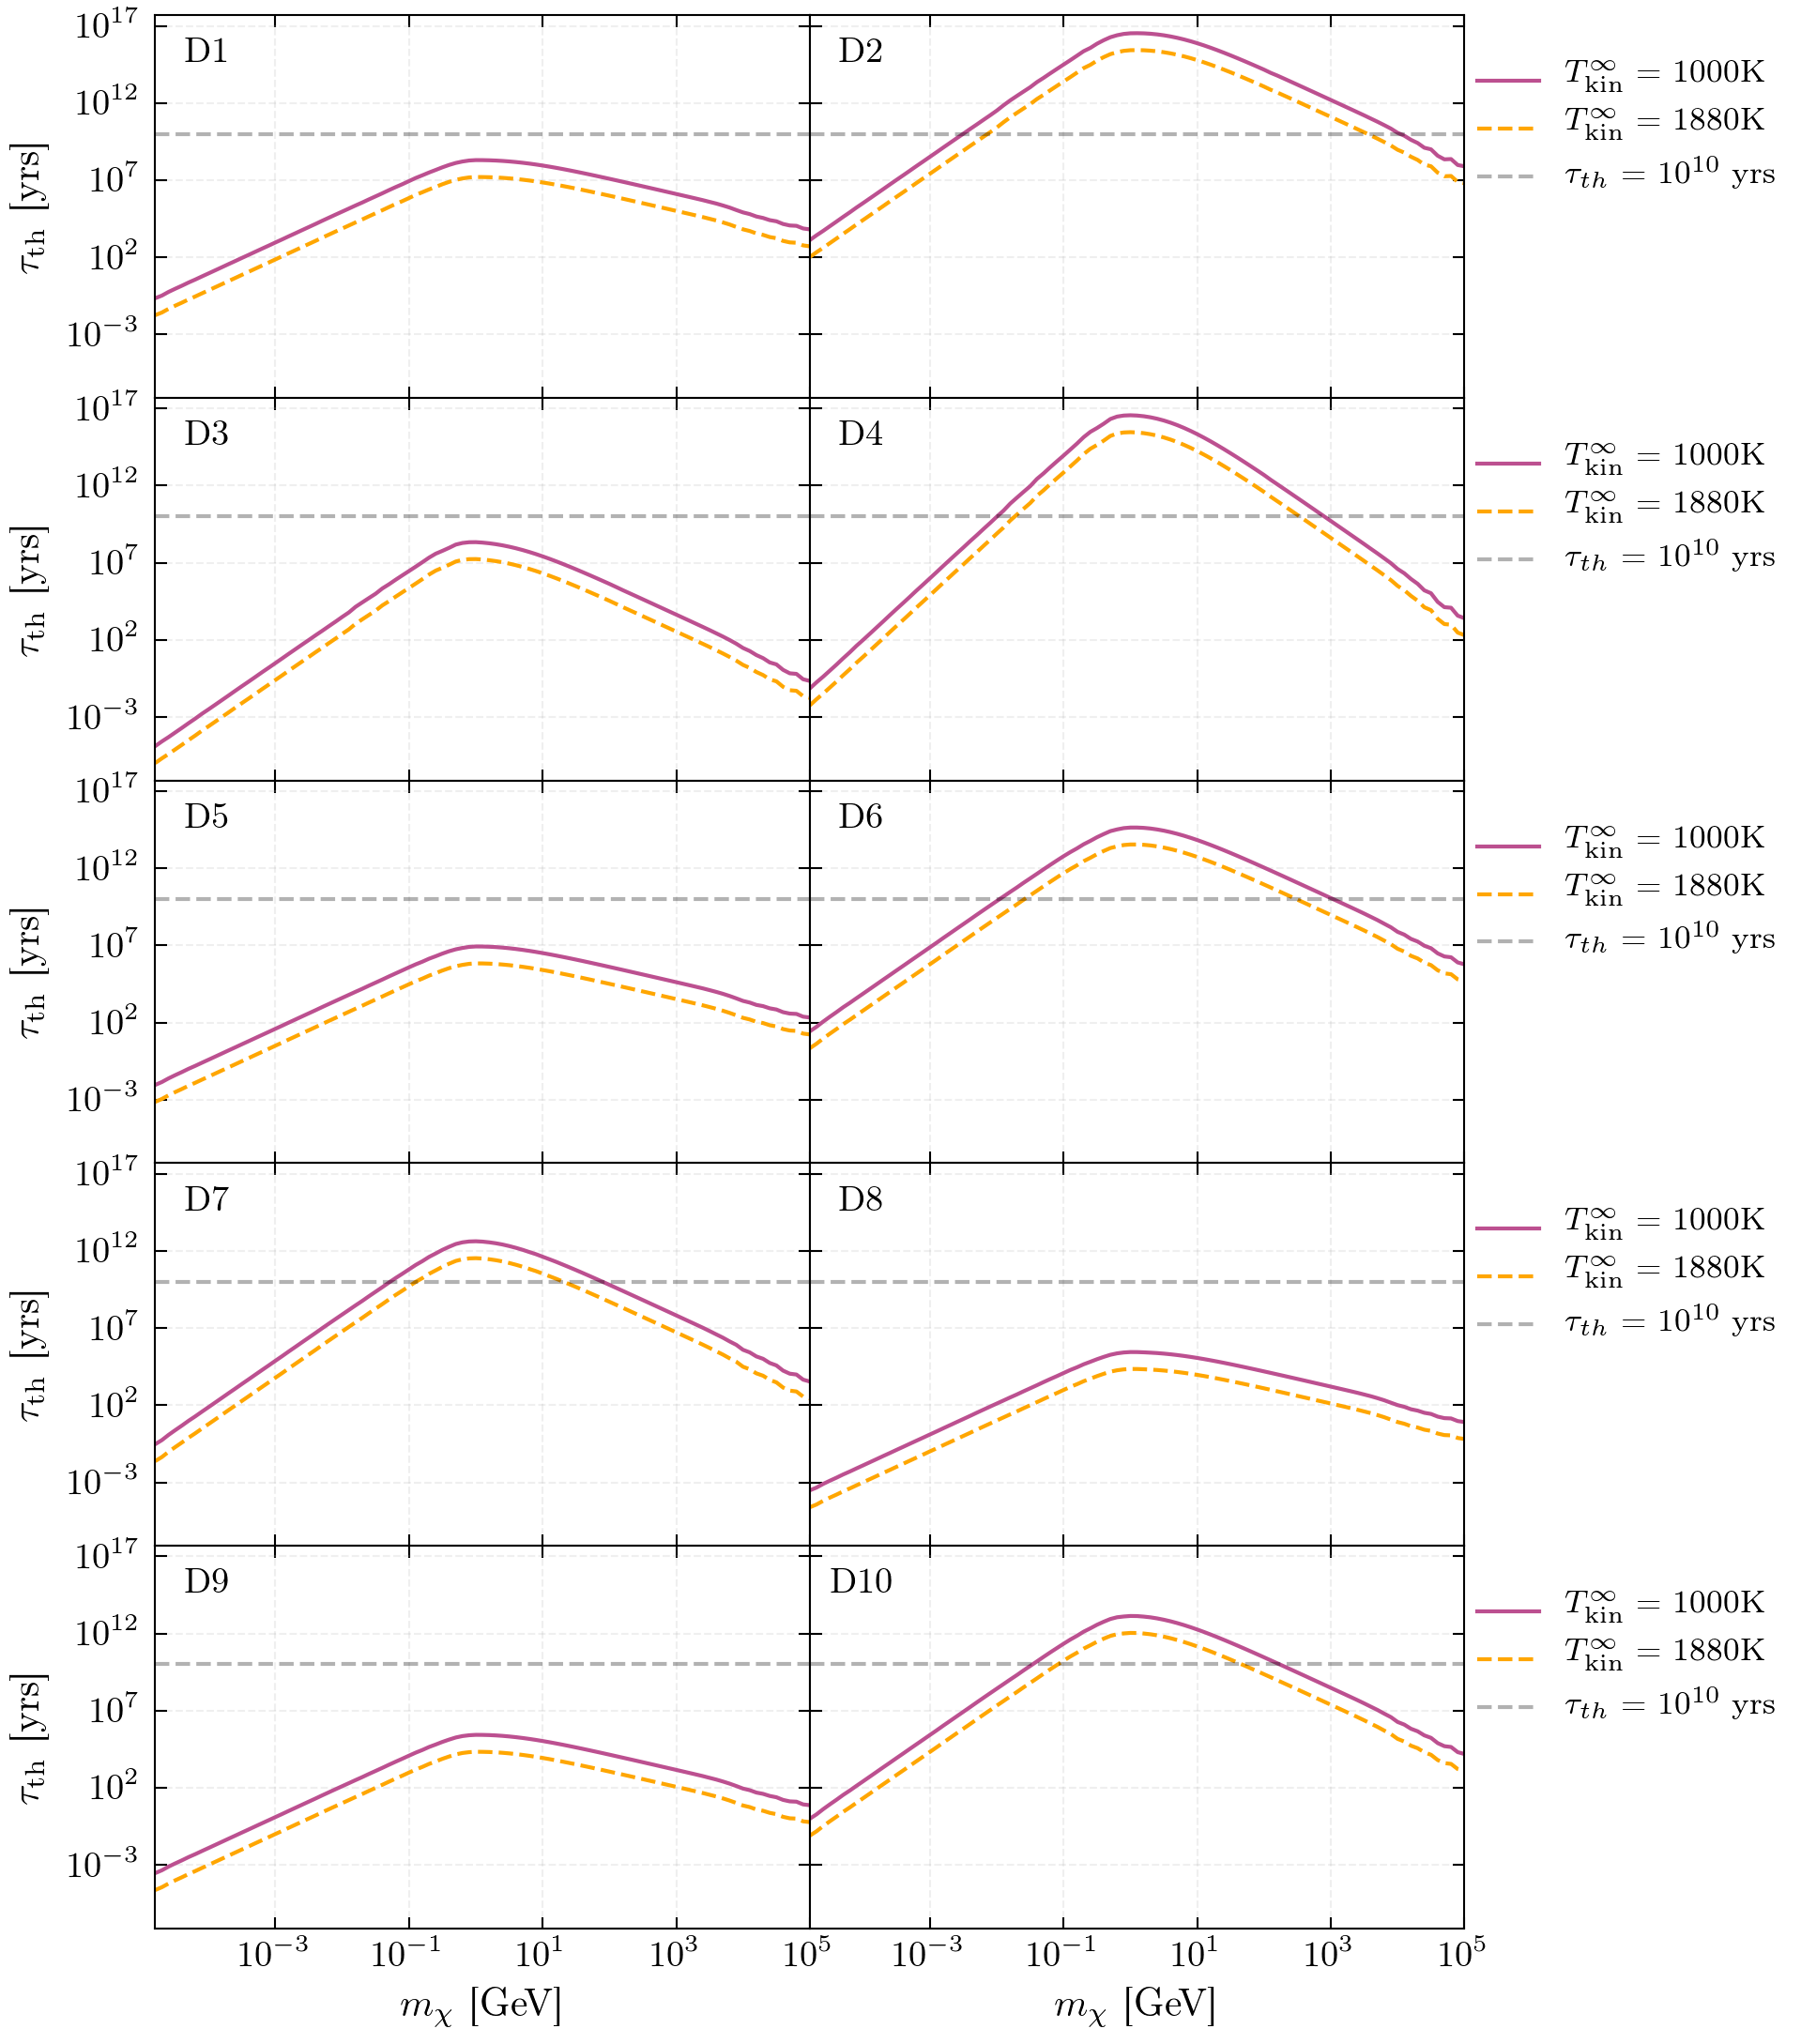

In [284]:
tt_kh_plots()

In [ ]:
def therm0(mu, T):
    """
    Returns time in 10^7 years
    """
    return 5.67 * (mu / (mu + 1)**2) * (10**3 / T)**2
def thermv2(mu, T):
    """
    Returns time in 10^17 years
    """
    return 2.83 * (mu**2 / (mu + 1)**4) * (10**3 / T)**3
def thermq2(mu, T):
    """
    Returns time in 10^16 years
    """
    return 9.19 * (mu**2 / (mu + 1)**4) * (10**3 / T)**3
def thermq4(mu, T):
    """
    Returns time in 10^26 years
    """
    return 5.90 * (mu**3 / (mu + 1)**6) * (10**3 / T)**4

In [232]:
def t0(mu, t):
    return 10**3 * np.sqrt((5.67**7 / t) * (mu / (mu + 1)**2))

def t1(mu, T):
    """
    Returns time in 10^17 years
    """
    return ((2.83**17 / T) * (mu**2 / (mu + 1)**4))**0.33

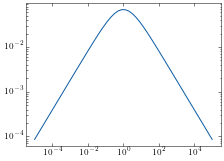

In [233]:
plt.loglog(mass_range, t1(mass_range, 10**10))

In [176]:
mass_range = np.logspace(-5, 5, 50)
temp_range = np.logspace(2, 9, 50)

mass_ops = [10**-5, 1, 10**5]
temp_ops = [10**3, 10**5, 10**7]

In [237]:

cols = ['#f0bc02','#00aa83' ,'#006a9c']
cols2 = [ '#0073a8', '#bc5090','#ffa600']

mlabs = ['$10^{-5}$', '$1$', '$10^5$']
tlabs = ['$10^3$ K', '$10^5$ K', '$10^7$ K']

linesstyles = ['-.', '-', ':']

def therm_cmop_plots():

    fig, ax = plt.subplots(figsize = (6, 9), ncols=2, nrows =4, sharex = 'col', dpi = 300)
    fig.subplots_adjust(hspace=0, wspace=0.12)
    # fig.text(0.5, 0.09, '$m_\chi$ [GeV]', ha='center', va = 'center')
    # fig.text(0.04, 0.5, '$G^2$ [GeV$^{-4}$]', va='center', rotation='vertical')
    
    for m in range(len(mass_ops))[:3]:
        ax[0,0].loglog(temp_range, therm0(mass_ops[m], temp_range), color = cols[m], label = mlabs[m], linestyle = linesstyles[m])
    for t in range(len(temp_ops))[:3]:
        ax[0,1].loglog(mass_range, therm0(mass_range, temp_ops[t]), color = cols2[t], label = tlabs[t])
    ax[0,0].set_ylabel('$\\tau_{\\text{th}, 0}$ [$10^7$ years]')
    ax[0,1].set_ylabel('$\\tau_{\\text{th}, 0}$ [$10^7$ years]')
    ax[0,0].axhline(10**3, color = 'black', alpha = 0.3, linestyle = '--')
    ax[0,1].axhline(10**3, 10**-5, 10**5, color = 'black', alpha = 0.3, linestyle = '--')
#     ax[0,0].legend(loc = 'lower left', title = '$\\mu$')
    
    ax[0,0].grid(b=True, which='major',  linestyle='--', alpha=0.2)
    ax[0,1].grid(b=True, which='major',  linestyle='--', alpha=0.2)
    
    ax[0,1].yaxis.set_label_position("right")
    ax[0,1].yaxis.tick_right()
    
    for m in range(len(mass_ops))[:3]:
        ax[1,0].loglog(temp_range, thermv2(mass_ops[m], temp_range), color = cols[m], label = mlabs[m], linestyle = linesstyles[m])
    for t in range(len(temp_ops))[:3]:
        ax[1,1].loglog(mass_range, thermv2(mass_range, temp_ops[t]), color = cols2[t], label = tlabs[t])
    ax[1,0].set_ylabel('$\\tau_{\\text{th}, v^2_r}$ [$10^{17}$ years]')
    ax[1,1].set_ylabel('$\\tau_{\\text{th}, v^2_r}$ [$10^{17}$ years]')
    ax[1,0].axhline(10**-7,  color = 'black', alpha = 0.3, linestyle = '--')
    ax[1,1].axhline(10**-7, 10**-5, 10**5, color = 'black', alpha = 0.3, linestyle = '--')
#     ax[1,0].legend(loc = 'lower left', title = '$\\mu$')
    
    ax[1,0].grid(b=True, which='major',  linestyle='--', alpha=0.2)
    ax[1,1].grid(b=True, which='major',  linestyle='--', alpha=0.2)
    
    ax[1,1].yaxis.set_label_position("right")
    ax[1,1].yaxis.tick_right()
    
    for m in range(len(mass_ops))[:3]:
        ax[2,0].loglog(temp_range, thermq2(mass_ops[m], temp_range), color = cols[m], label = mlabs[m], linestyle = linesstyles[m])
    for t in range(len(temp_ops))[:3]:
        ax[2,1].loglog(mass_range, thermq2(mass_range, temp_ops[t]), color = cols2[t], label = tlabs[t])
    ax[2,0].set_ylabel('$\\tau_{\\text{th},q^2}$ [$10^{16}$ years]')
    ax[2,1].set_ylabel('$\\tau_{\\text{th},q^2}$ [$10^{16}$ years]')
#     ax[2,0].legend(loc = 'lower left', title = '$\\mu$')
    
    ax[2,0].axhline(10**-6, color = 'black', alpha = 0.3, linestyle = '--')
    ax[2,1].axhline(10**-6, 10**-5, 10**5, color = 'black', alpha = 0.3, linestyle = '--')
    ax[2, 0].grid(b=True, which='major',  linestyle='--', alpha=0.2)
    ax[2, 1].grid(b=True, which='major',  linestyle='--', alpha=0.2)
    
    ax[2,1].yaxis.set_label_position("right")
    ax[2,1].yaxis.tick_right()
    
    for m in range(len(mass_ops))[:3]:
        ax[3,0].loglog(temp_range, thermq4(mass_ops[m], temp_range), color = cols[m], label = mlabs[m], linestyle = linesstyles[m])
    for t in range(len(temp_ops))[:3]:
        ax[3,1].loglog(mass_range, thermq4(mass_range, temp_ops[t]), color = cols2[t], label = tlabs[t])
    ax[3,0].set_ylabel('$\\tau_{\\text{th},q^4}$ [$10^{26}$ years]')
    
    ax[3,0].set_xlim(10**2, 10**7)
    ax[3,1].set_xlim(10**-5, 10**5)
    ax[3, 0].grid(b=True, which='major',  linestyle='--', alpha=0.2)
    ax[3, 1].grid(b=True, which='major',  linestyle='--', alpha=0.2)
    
    ax[3,0].axhline(10**-16, color = 'black', alpha = 0.3, linestyle = '--')   
    ax[3,1].axhline(10**-16, 10**-5, 10**5, color = 'black', alpha = 0.3, linestyle = '--')
    ax[3,0].legend(loc = 'lower left', title = '$\\mu$')
    ax[3,0].set_xlabel('$T_\\star$ [K]')
    ax[3,1].set_xlabel('$\\mu = m_\\chi/m_n$')
    ax[3,1].set_ylabel('$\\tau_{\\text{th}, q^4}$ [$10^{26}$ years]')
    ax[3,1].yaxis.set_label_position("right")
    ax[3,1].yaxis.tick_right()
    
    
    
    plt.savefig('init_therm_plots.pdf')
    plt.show()

/home/student.unimelb.edu.au/mvirgato/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:6652: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


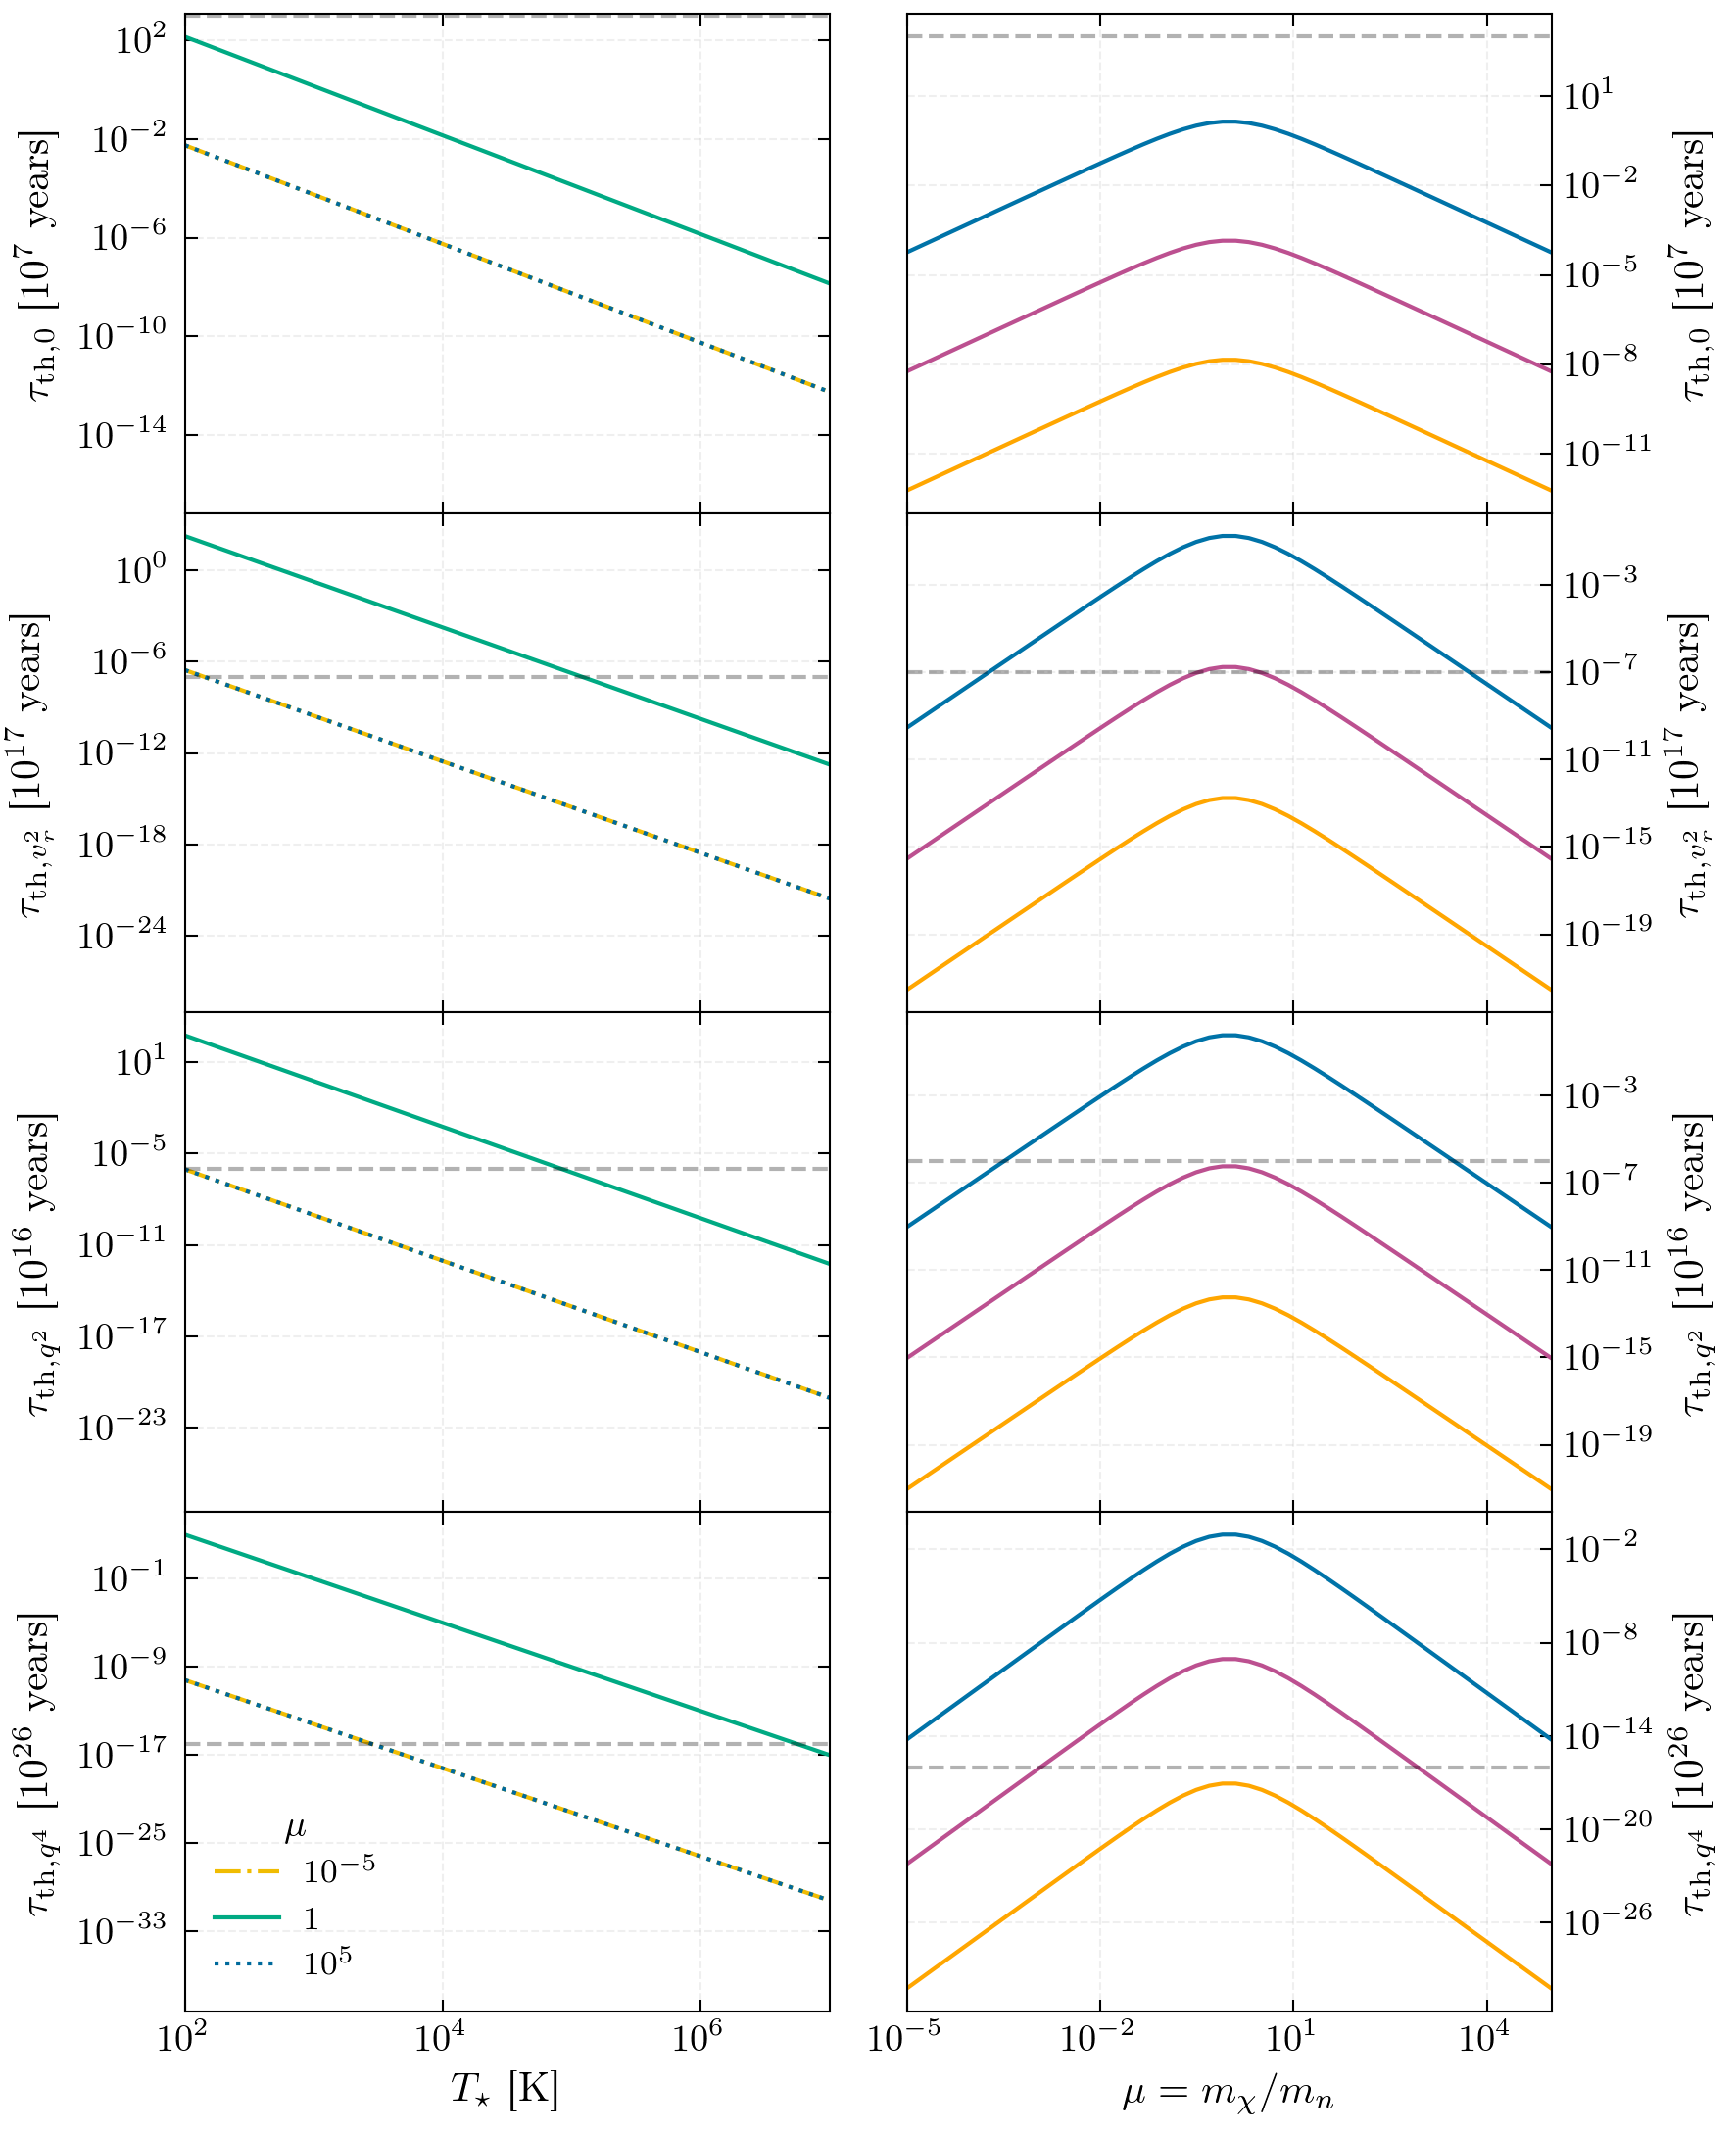

In [238]:
therm_cmop_plots()